# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Angga Dharma Iswara
- **Email:** angga.dharma60@gmail.com
- **ID Dicoding:** anggadharma60

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Berapa persentase tipe pembayaran yang telah terjadi pada platform?

---


- Pertanyaan 2: Berapa tingkat kepuasan pada semua transaksi yang telah berlangsung pada platform?

## Import Semua Packages/Library yang Digunakan

In [1]:
import zipfile, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv('data/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation =  pd.read_csv('data/geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv('data/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders = pd.read_csv('data/orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category = pd.read_csv('data/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products = pd.read_csv('data/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv('data/sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Melihat Informasi Dataset

In [11]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [12]:
print(geolocation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


In [13]:
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [14]:
print(order_payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [15]:
print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [16]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [17]:
print(product_category.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


In [18]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [19]:
print(sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


#### Missing Value

In [20]:
print(customers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [21]:
print(geolocation.isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [22]:
print(order_items.isnull().sum())

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [23]:
print(order_payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [24]:
print(order_reviews.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [25]:
print(orders.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [26]:
print(product_category.isnull().sum())

product_category_name            0
product_category_name_english    0
dtype: int64


In [27]:
print(products.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [28]:
print(sellers.isnull().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


#### Duplicate Data

In [29]:
print("Data duplikat cutomers:", customers.duplicated().sum())

Data duplikat cutomers: 0


In [30]:
print("Data duplikat geolocation:", geolocation.duplicated().sum())

Data duplikat geolocation: 261831


In [31]:
print("Data duplikat order items:", order_items.duplicated().sum())

Data duplikat order items: 0


In [32]:
print("Data duplikat order payments:", order_payments.duplicated().sum())

Data duplikat order payments: 0


In [33]:
print("Data duplikat order reviews:", order_reviews.duplicated().sum())

Data duplikat order reviews: 0


In [34]:
print("Data duplikat orders:", orders.duplicated().sum())

Data duplikat orders: 0


In [35]:
print("Data duplikat product category:", product_category.duplicated().sum())

Data duplikat product category: 0


In [36]:
print("Data duplikat products:", products.duplicated().sum())

Data duplikat products: 0


In [37]:
print("Data duplikat sellers:", sellers.duplicated().sum())

Data duplikat sellers: 0


### Cleaning Data

#### Formatting

Mengubah tanggal dan waktu dari format string ke datetime
> Formatting: String->Datetime

In [38]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

#### Imputation




Mengisi missing value pada kolom review_comment_title dan review_comment_message dari data order reviews.


> Input: No Title Review and No Comment Review

In [39]:
order_reviews['review_comment_title'].fillna("No Title Review", inplace=True)
order_reviews['review_comment_message'].fillna("No Comment Review", inplace=True)

In [40]:
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Dropping

Menghapus kategori yang tidak memiliki informasi pada kolom payment_type dari data order payments.


> Delete: Payment_type dengan kategori not_defined karena memiliki jumlah yang sedikit dan mempunya value 0

In [41]:
order_payments.groupby('payment_type')['payment_value'].agg(['sum', 'count'])

,sum,count
payment_type,,
boleto,2869361.27,19784
credit_card,12542084.19,76795
debit_card,217989.79,1529
not_defined,0.00,3
voucher,379436.87,5775


In [42]:
order_payments.drop(order_payments[order_payments['payment_type'] == "not_defined"].index, inplace=True)

Menghapus duplikasi data pada data geolocation.


> Delete: Duplikasi data

In [43]:
geolocation['geolocation_city'].apply(lambda x : unidecode(x))

0                sao paulo
1                sao paulo
2                sao paulo
3                sao paulo
4                sao paulo
                ...       
1000158           tapejara
1000159     getulio vargas
1000160           tapejara
1000161    david canabarro
1000162           tapejara
Name: geolocation_city, Length: 1000163, dtype: object

In [44]:
geolocation.drop_duplicates(inplace=True)

In [45]:
geolocation.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### Explore Data Customers

In [46]:
print("Describe customers:\n", customers.describe(include='all'))

Describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_

In [47]:
#Proses Pemetaan Banyak Customer Tiap State
customers.groupby('customer_state')['customer_id'].count().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Data Geolocation

In [48]:
print("Describe geolocation:\n", geolocation.describe(include='all'))

Describe geolocation:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000    738332.000000   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   38316.086800       -20.998353       -46.461098   
std                    30632.496675         5.892315         4.393705   
min                     1001.000000       -36.605374      -101.466766   
25%                    12600.000000       -23.603061       -48.867822   
50%                    29144.000000       -22.873588       -46.647278   
75%                    65950.000000       -19.923336       -43.836974   
max                    99990.000000        45.065933       121.105394   

       geolocation_city geolocation_state  
count            738332            738332  
unique      

### Explore Data Order Items

In [49]:
print("Describe order items:\n", order_items.describe(include='all'))

Describe order items:
                                 order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e6831

In [50]:
#Jumlah order berdasarkan state
order_items_state = pd.merge(left=order_items,right=sellers, how="left",
    left_on="seller_id",
    right_on="seller_id")

In [51]:
order_items_state.groupby('seller_state')['product_id'].count().sort_values(ascending=False)

seller_state
SP    80342
MG     8827
PR     8671
RJ     4818
SC     4075
RS     2199
DF      899
BA      643
GO      520
PE      448
MA      405
ES      372
MT      145
CE       94
RN       56
MS       50
PB       38
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: product_id, dtype: int64

### Explore Data Order Payments

In [52]:
print("Describe order payments:\n", order_payments.describe(include='all'))

Describe order payments:
                                 order_id  payment_sequential payment_type  \
count                             103883       103883.000000       103883   
unique                             99437                 NaN            4   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092681          NaN   
std                                  NaN            0.706594          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
cou

In [53]:
# Total pembayaran tiap tipe pembayaran
order_payments.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
Name: payment_value, dtype: float64

In [54]:
#Banyaknya pembayaran tiap tipe pembayaran
order_payments.groupby('payment_type')['payment_value'].count().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_value, dtype: int64

### Explore Data Order Reviews

In [55]:
print("Describe order reviews:\n", order_reviews.describe(include='all'))

Describe order reviews:
                                review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_ti

In [56]:
#Review Score By Index
order_reviews.groupby('review_score')['review_id'].count().sort_index(ascending=False)

review_score
5    57328
4    19142
3     8179
2     3151
1    11424
Name: review_id, dtype: int64

In [57]:
#Review Score by Value
order_reviews.groupby('review_score')['review_id'].count().sort_values(ascending=False)

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_id, dtype: int64

### Explore Data Orders

In [58]:
print("Describe orders:\n", orders.describe(include='all'))

Describe orders:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status       order_purchase_timestamp    order_approved_at  \
count         99441                          994

In [59]:
#Jumlah customer berdasarkan state yang melakukan order
orders_state = pd.merge(left=orders,right=customers, how="left",
    left_on="customer_id",
    right_on="customer_id")

In [60]:
orders_state.groupby('customer_state')['customer_id'].count().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [61]:
orders.groupby('order_status')['order_id'].count().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Explore Data Product Category

In [62]:
print("Describe product category:\n", product_category.describe(include='all'))

Describe product category:
        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


### Explore Data Products



In [63]:
print("Describe products:\n", products.describe(include='all'))

Describe products:
                               product_id product_category_name  \
count                              32951                 32341   
unique                             32951                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32341.000000                32341.000000        32341.000000   
unique                  NaN  

In [64]:
#Pemetaan antara kategori dan jumlah produk
orders_state = pd.merge(left=products,right=product_category, how="left",
    left_on="product_category_name",
    right_on="product_category_name")

In [65]:
orders_state.groupby('product_category_name_english')['product_id'].count().sort_values(ascending=False)

product_category_name_english
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
home_comfort_2                  5
fashion_childrens_clothes       5
security_and_services           2
cds_dvds_musicals               1
Name: product_id, Length: 71, dtype: int64

### Explore Data Sellers

In [66]:
print("Describe sellers:\n", sellers.describe(include='all'))

Describe sellers:
                                seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state 

In [67]:
#Pemetaan sellers tiap state
sellers.groupby('seller_state')['seller_id'].count().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

## Teknik Analysis Lanjutan


### RFM Analysis


---

Pada analisis RFM menggunakan data orders dengan status 'delivered'. Hal ini bertujuan untuk memastikan proses transaksi dinyatakan selesai sehingga customer sudah dianggap melakukan pembelian.

In [68]:
delivered_orders = orders[orders['order_status']=='delivered']

In [69]:
merge_order_customer = pd.merge(left=delivered_orders, right=customers, how="inner", left_on='customer_id', right_on='customer_id')

In [70]:
merge_order_items = pd.merge(left=merge_order_customer, right=order_items, how="inner", left_on='order_id', right_on='order_id')

In [71]:
merge_transaction = pd.merge(left=merge_order_items, right=order_payments, how="inner", left_on='order_id', right_on='order_id')

In [72]:
merge_data = pd.merge(left=merge_transaction, right=order_reviews, how="inner", left_on='order_id', right_on='order_id')

In [73]:
merge_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

#### Recency

Asumsi : variable now adalah waktu transaksi paling terakhir dari semua data

In [74]:
recency=merge_data.groupby('customer_id', as_index=False)['order_purchase_timestamp'].max()
recency.columns = ['customer_id', 'last_purchase']
now = recency['last_purchase'].max()
recency['Recency'] = (now - recency['last_purchase']).dt.days
recency = recency[['customer_id', 'Recency']]
recency.head(10)

,customer_id,Recency
0,00012a2ce6f8dcda20d059ce98491703,287
1,000161a058600d5901f007fab4c27140,409
2,0001fd6190edaaf884bcaf3d49edf079,547
3,0002414f95344307404f0ace7a26f1d5,378
4,000379cdec625522490c315e70c7a9fb,149
5,0004164d20a9e969af783496f3408652,504
6,000419c5494106c306a97b5635748086,179
7,00046a560d407e99b969756e0b10f282,254
8,00050bf6e01e69d5c0fd612f1bcfb69c,345
9,000598caf2ef4117407665ac33275130,18


#### Frequency

In [75]:
frequency=merge_data.groupby('customer_id', as_index=False)['order_id'].count()
frequency.columns = ['customer_id', 'Frequency']
frequency.head(10)


,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
5,0004164d20a9e969af783496f3408652,1
6,000419c5494106c306a97b5635748086,1
7,00046a560d407e99b969756e0b10f282,1
8,00050bf6e01e69d5c0fd612f1bcfb69c,1
9,000598caf2ef4117407665ac33275130,1


#### Monetary

In [76]:
monetary = merge_data.groupby('customer_id', as_index=False)['payment_value'].sum()
monetary.columns = ['customer_id', 'Monetary']

In [77]:
rfm = pd.merge(left=pd.merge(left=recency, right=frequency, left_on='customer_id', right_on='customer_id'), right= monetary, left_on='customer_id', right_on='customer_id')
rfm.head(10)


,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35
4,000379cdec625522490c315e70c7a9fb,149,1,107.01
5,0004164d20a9e969af783496f3408652,504,1,71.80
6,000419c5494106c306a97b5635748086,179,1,49.40
7,00046a560d407e99b969756e0b10f282,254,1,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,345,1,85.23
9,000598caf2ef4117407665ac33275130,18,1,1255.71


In [78]:
rfm.describe()

,Recency,Frequency,Monetary
count,95831.000000,95831.000000,95831.000000
mean,238.965982,1.198558,205.260056
std,152.855231,0.747027,608.501023
min,0.000000,1.000000,9.590000
25%,115.000000,1.000000,62.780000
50%,220.000000,1.000000,109.920000
75%,349.000000,1.000000,195.910000
max,695.000000,63.000000,109312.640000


In [79]:
merge_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [80]:
merge_data =merge_data[['order_id', 'customer_id', 'order_purchase_timestamp','order_item_id', 'product_id', 'seller_id','payment_type','payment_value', 'review_id','review_score']]

In [81]:
merge_data.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'payment_type', 'payment_value', 'review_id',
       'review_score'],
      dtype='object')

In [82]:
merge_data.to_csv('dashboard/all_data.csv')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persentase tipe pembayaran yang telah terjadi pada platform?

In [83]:
data= merge_data.groupby('payment_type')['order_id'].count()
data

payment_type
boleto         22337
credit_card    84732
debit_card      1655
voucher         6135
Name: order_id, dtype: int64

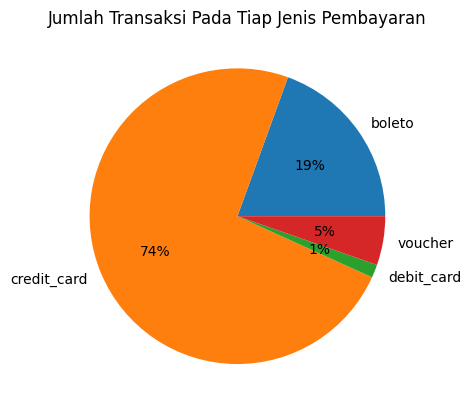

In [84]:
plt.pie(data, labels=data.index,autopct='%.0f%%')
plt.title("Jumlah Transaksi Pada Tiap Jenis Pembayaran")
plt.show()

### Pertanyaan 2: Berapa tingkat kepuasan pada semua transaksi yang telah berlangsung pada platform?

In [85]:
data = merge_data['review_score'].value_counts()
data

review_score
5    66046
4    22150
1    13115
3     9649
2     3899
Name: count, dtype: int64

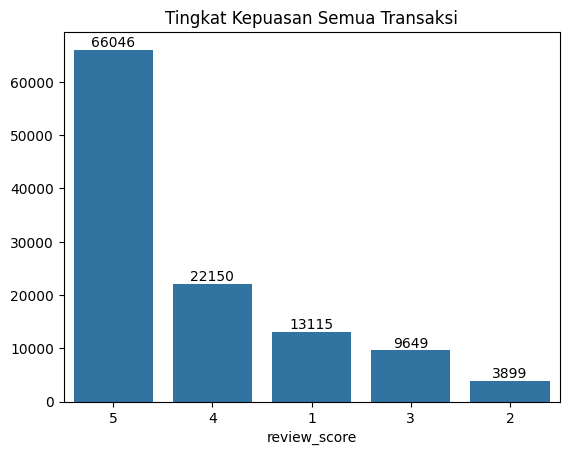

In [86]:
ax = sns.barplot(x=data.index,
            y=data.values,
            order=data.index,
            )
ax.bar_label(ax.containers[0])
plt.title('Tingkat Kepuasan Semua Transaksi')
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Berdasarkan pada visualisasi pertama mengenai jumlah tipe pembayaran diketahui bahwa tipe pembayaran menggunakan credit card memiliki persentase paling tinggi yaitu 74%. Hal ini dapat dimanfaatkan untuk memperbanyak promo dan kerja sama dengan penyedia credit card untuk meningkatkan jumlah customer.

---


- Conclution pertanyaan 2:
Berdasarkan pada visualisasi kedua mengenai tingkat kepuasan diketahui bahwa terdapat review dengan nilai 1 sebanyak 11424. Hal ini bisa digunakan sebagai bahan evaluasi platform untuk memperbaiki tingkat kepuasan platform baik dari segi penjual, kualitas barang, dan jasa pengiriman